# Pandas Summary
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- Object Creation
- Viewing Data
- Selection
- Setting
- Missing Data
- Operations
- Merge
- Grouping
- Reshaping
- Pivot Tables
- Time Series
- Plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Object Creation

##### create Series

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

##### create DataFrame

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randint(-5, 5, size=(6,4)), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,4,0,2,-4
2013-01-02,-3,-4,1,-5
2013-01-03,-2,0,2,-4
2013-01-04,0,3,1,-3
2013-01-05,-4,0,-1,-4
2013-01-06,-2,2,-2,-1


In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Viewing Data

In [7]:
df.head()

,A,B,C,D
2013-01-01,4,0,2,-4
2013-01-02,-3,-4,1,-5
2013-01-03,-2,0,2,-4
2013-01-04,0,3,1,-3
2013-01-05,-4,0,-1,-4


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,0,3,1,-3
2013-01-05,-4,0,-1,-4
2013-01-06,-2,2,-2,-1


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 4,  0,  2, -4],
       [-3, -4,  1, -5],
       [-2,  0,  2, -4],
       [ 0,  3,  1, -3],
       [-4,  0, -1, -4],
       [-2,  2, -2, -1]])

In [12]:
# Describe shows a quick statistic summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-1.166667,0.166667,0.500000,-3.500000
std,2.857738,2.401388,1.643168,1.378405
min,-4.000000,-4.000000,-2.000000,-5.000000
25%,-2.750000,0.000000,-0.500000,-4.000000
50%,-2.000000,0.000000,1.000000,-4.000000
75%,-0.500000,1.500000,1.750000,-3.250000
max,4.000000,3.000000,2.000000,-1.000000


In [13]:
# Transposing
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,4,-3,-2,0,-4,-2
B,0,-4,0,3,0,2
C,2,1,2,1,-1,-2
D,-4,-5,-4,-3,-4,-1


### Selection

##### Getting

In [14]:
df['A']

2013-01-01    4
2013-01-02   -3
2013-01-03   -2
2013-01-04    0
2013-01-05   -4
2013-01-06   -2
Freq: D, Name: A, dtype: int64

In [15]:
df[0:3]

,A,B,C,D
2013-01-01,4,0,2,-4
2013-01-02,-3,-4,1,-5
2013-01-03,-2,0,2,-4


##### Selection by Label

In [16]:
df.loc[dates[0]]

A    4
B    0
C    2
D   -4
Name: 2013-01-01 00:00:00, dtype: int64

In [17]:
df.loc[:,['A','B']]

,A,B
2013-01-01,4,0
2013-01-02,-3,-4
2013-01-03,-2,0
2013-01-04,0,3
2013-01-05,-4,0
2013-01-06,-2,2


In [18]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-3,-4
2013-01-03,-2,0
2013-01-04,0,3


In [19]:
df.loc['20130102', ['A','B']]

A   -3
B   -4
Name: 2013-01-02 00:00:00, dtype: int64

In [20]:
%%timeit
# For getting a scalar value
df.loc[dates[0],'A']

17.8 µs ± 429 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
%%timeit
# For getting fast access to a scalar 
df.at[dates[0],'A']

14.7 µs ± 277 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


##### Selection by Position
- http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer

In [22]:
df.iloc[3]

A    0
B    3
C    1
D   -3
Name: 2013-01-04 00:00:00, dtype: int64

In [23]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0,3
2013-01-05,-4,0


In [24]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-3,1
2013-01-03,-2,2
2013-01-05,-4,-1


In [25]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-3,-4,1,-5
2013-01-03,-2,0,2,-4


In [26]:
df.iloc[:,1:3]

,B,C
2013-01-01,0,2
2013-01-02,-4,1
2013-01-03,0,2
2013-01-04,3,1
2013-01-05,0,-1
2013-01-06,2,-2


In [27]:
%%timeit
df.iloc[1,1]

8.96 µs ± 303 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
%%timeit
# For getting fast access to a scalar
df.iat[1,1]

6.12 µs ± 260 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


##### Boolean Indexing

In [29]:
df[df.A > 0]

,A,B,C,D
2013-01-01,4,0,2,-4


In [30]:
df[df > 0]

,A,B,C,D
2013-01-01,4.0,NaN,2.0,NaN
2013-01-02,NaN,NaN,1.0,NaN
2013-01-03,NaN,NaN,2.0,NaN
2013-01-04,NaN,3.0,1.0,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,2.0,NaN,NaN


##### isin method

In [31]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,4,0,2,-4,one
2013-01-02,-3,-4,1,-5,one
2013-01-03,-2,0,2,-4,two
2013-01-04,0,3,1,-3,three
2013-01-05,-4,0,-1,-4,four
2013-01-06,-2,2,-2,-1,three


In [32]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-2,0,2,-4,two
2013-01-05,-4,0,-1,-4,four


### Setting

In [33]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [34]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,4,0,2,-4,NaN
2013-01-02,-3,-4,1,-5,1.0
2013-01-03,-2,0,2,-4,2.0
2013-01-04,0,3,1,-3,3.0
2013-01-05,-4,0,-1,-4,4.0
2013-01-06,-2,2,-2,-1,5.0


In [35]:
# Setting values by label
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0,0,2,-4,NaN
2013-01-02,-3,-4,1,-5,1.0
2013-01-03,-2,0,2,-4,2.0
2013-01-04,0,3,1,-3,3.0
2013-01-05,-4,0,-1,-4,4.0
2013-01-06,-2,2,-2,-1,5.0


In [36]:
# Setting values by position
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0,0,2,-4,NaN
2013-01-02,-3,-4,1,-5,1.0
2013-01-03,-2,0,2,-4,2.0
2013-01-04,0,3,1,-3,3.0
2013-01-05,-4,0,-1,-4,4.0
2013-01-06,-2,2,-2,-1,5.0


In [37]:
# Setting by assigning with a numpy array
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0,0,2,5,NaN
2013-01-02,-3,-4,1,5,1.0
2013-01-03,-2,0,2,5,2.0
2013-01-04,0,3,1,5,3.0
2013-01-05,-4,0,-1,5,4.0
2013-01-06,-2,2,-2,5,5.0


In [38]:
# 0보다 큰 value만 -를 붙임
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0,0,-2,-5,NaN
2013-01-02,-3,-4,-1,-5,-1.0
2013-01-03,-2,0,-2,-5,-2.0
2013-01-04,0,-3,-1,-5,-3.0
2013-01-05,-4,0,-1,-5,-4.0
2013-01-06,-2,-2,-2,-5,-5.0


### Missing Data

In [39]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0,0,2,5,NaN,1.0
2013-01-02,-3,-4,1,5,1.0,1.0
2013-01-03,-2,0,2,5,2.0,NaN
2013-01-04,0,3,1,5,3.0,NaN


In [40]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-3,-4,1,5,1.0,1.0


In [41]:
# Filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0,0,2,5,5.0,1.0
2013-01-02,-3,-4,1,5,1.0,1.0
2013-01-03,-2,0,2,5,2.0,5.0
2013-01-04,0,3,1,5,3.0,5.0


### Operations

### Stats

In [42]:
# 각 colum별 평균
df.mean()

A   -1.833333
B    0.166667
C    0.500000
D    5.000000
F    3.000000
dtype: float64

In [43]:
# axis - 0:columns, 1:rows
df.mean(1)

2013-01-01    1.75
2013-01-02    0.00
2013-01-03    1.40
2013-01-04    2.40
2013-01-05    0.80
2013-01-06    1.60
Freq: D, dtype: float64

In [44]:
# shift
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [45]:
# df에서 모든 컬럼에 s를 빼줌
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-3.0,-1.0,1.0,4.0,1.0
2013-01-04,-3.0,0.0,-2.0,2.0,0.0
2013-01-05,-9.0,-5.0,-6.0,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


##### Histogramming
- http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization

In [46]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    2
2    1
3    2
4    5
5    5
6    2
7    2
8    4
9    6
dtype: int64

In [47]:
s.value_counts()

2    4
5    3
6    1
4    1
1    1
dtype: int64

##### String Methods
- http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods

In [48]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [49]:
_.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [50]:
_.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

### Merge

##### concat

In [51]:
df = pd.DataFrame(np.random.randint(1,10, size=(10,4)))
df

,0,1,2,3
0,4,1,6,7
1,4,3,7,9
2,6,1,2,1
3,3,8,6,4
4,9,8,8,4
5,2,2,5,4
6,5,8,1,1
7,1,5,1,7
8,6,2,8,9
9,7,2,7,5


In [52]:
pieces = [df[:3], df[3:7], df[7:]]
print(pieces[0], end="\n\n")
print(pieces[1], end="\n\n")
print(pieces[2])

   0  1  2  3
0  4  1  6  7
1  4  3  7  9
2  6  1  2  1

   0  1  2  3
3  3  8  6  4
4  9  8  8  4
5  2  2  5  4
6  5  8  1  1

   0  1  2  3
7  1  5  1  7
8  6  2  8  9
9  7  2  7  5


In [53]:
pd.concat(pieces)

,0,1,2,3
0,4,1,6,7
1,4,3,7,9
2,6,1,2,1
3,3,8,6,4
4,9,8,8,4
5,2,2,5,4
6,5,8,1,1
7,1,5,1,7
8,6,2,8,9
9,7,2,7,5


##### Join
- http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join

In [54]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [55]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [56]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [57]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [58]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [59]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


##### Append
- http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation

In [60]:
df = pd.DataFrame(np.random.randint(10, size=(8, 4)), columns=['A','B','C','D'])
df

,A,B,C,D
0,6,3,2,4
1,1,5,4,1
2,7,6,7,4
3,3,3,5,8
4,3,5,8,5
5,4,6,6,1
6,9,2,7,3
7,8,0,1,5


In [61]:
s = df.iloc[3]
s

A    3
B    3
C    5
D    8
Name: 3, dtype: int64

In [64]:
df.append(s, ignore_index=True)

,A,B,C,D
0,6,3,2,4
1,1,5,4,1
2,7,6,7,4
3,3,3,5,8
4,3,5,8,5
5,4,6,6,1
6,9,2,7,3
7,8,0,1,5
8,3,3,5,8


### Grouping
- http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby

In [66]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],      
                    'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],               
                    'C' : np.random.randint(10, size=8),
                    'D' : np.random.randint(10, size=8)})
df

,A,B,C,D
0,foo,one,8,1
1,bar,one,2,0
2,foo,two,4,7
3,bar,three,2,9
4,foo,two,6,9
5,bar,two,0,7
6,foo,one,2,7
7,foo,three,6,2


In [67]:
df.groupby('A').sum()

,C,D
A,,
bar,4,16
foo,26,26


In [68]:
df.groupby(['A','B']).sum()

C   D
A   B            
bar one     2   0
    three   2   9
    two     0   7
foo one    10   8
    three   6   2
    two    10  16

### Reshaping
- http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking

##### Stack

In [69]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [70]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [83]:
df = pd.DataFrame(np.random.randint(10, size=(8, 2)), index=index, columns=['A', 'B'])
df

A  B
first second      
bar   one     6  0
      two     2  5
baz   one     7  4
      two     9  2
foo   one     5  5
      two     3  0
qux   one     5  2
      two     9  9

In [84]:
df2 = df[:4]
df2

A  B
first second      
bar   one     6  0
      two     2  5
baz   one     7  4
      two     9  2

In [85]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    6
               B    0
       two     A    2
               B    5
baz    one     A    7
               B    4
       two     A    9
               B    2
dtype: int64

In [86]:
stacked.unstack()

A  B
first second      
bar   one     6  0
      two     2  5
baz   one     7  4
      two     9  2

In [87]:
stacked.unstack(1)

second   one  two
first            
bar   A    6    2
      B    0    5
baz   A    7    9
      B    4    2

In [88]:
stacked.unstack(0)

first     bar  baz
second            
one    A  6.0  7.0
       B  0.0  4.0
two    A  2.0  9.0
       B  5.0  2.0

In [89]:
stacked.unstack(2)

A  B
first second      
bar   one     6  0
      two     2  5
baz   one     7  4
      two     9  2

### Pivot Tables
- http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot

In [91]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randint(10, size=12),
                    'E' : np.random.randint(10, size=12)})
df

,A,B,C,D,E
0,one,A,foo,2,5
1,one,B,foo,3,4
2,two,C,foo,5,0
3,three,A,bar,1,3
4,one,B,bar,8,0
5,one,C,bar,9,9
6,two,A,foo,4,7
7,three,B,foo,5,8
8,one,C,foo,3,6
9,one,A,bar,8,5


In [92]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C        bar  foo
A     B          
one   A  8.0  2.0
      B  8.0  3.0
      C  9.0  3.0
three A  1.0  NaN
      B  NaN  5.0
      C  9.0  NaN
two   A  NaN  4.0
      B  0.0  NaN
      C  NaN  5.0

### Time Series
- http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries

In [114]:
# freq - http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases
rng = pd.date_range('2018-01-01', periods=100, freq='Min')
rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:01:00',
               '2018-01-01 00:02:00', '2018-01-01 00:03:00',
               '2018-01-01 00:04:00', '2018-01-01 00:05:00',
               '2018-01-01 00:06:00', '2018-01-01 00:07:00',
               '2018-01-01 00:08:00', '2018-01-01 00:09:00',
               '2018-01-01 00:10:00', '2018-01-01 00:11:00',
               '2018-01-01 00:12:00', '2018-01-01 00:13:00',
               '2018-01-01 00:14:00', '2018-01-01 00:15:00',
               '2018-01-01 00:16:00', '2018-01-01 00:17:00',
               '2018-01-01 00:18:00', '2018-01-01 00:19:00',
               '2018-01-01 00:20:00', '2018-01-01 00:21:00',
               '2018-01-01 00:22:00', '2018-01-01 00:23:00',
               '2018-01-01 00:24:00', '2018-01-01 00:25:00',
               '2018-01-01 00:26:00', '2018-01-01 00:27:00',
               '2018-01-01 00:28:00', '2018-01-01 00:29:00',
               '2018-01-01 00:30:00', '2018-01-01 00:31:00',
               '2018-01-

In [115]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2018-01-01 00:00:00    284
2018-01-01 00:01:00    429
2018-01-01 00:02:00    461
2018-01-01 00:03:00    418
2018-01-01 00:04:00    262
2018-01-01 00:05:00     64
2018-01-01 00:06:00     12
2018-01-01 00:07:00    266
2018-01-01 00:08:00    117
2018-01-01 00:09:00    495
2018-01-01 00:10:00    274
2018-01-01 00:11:00    442
2018-01-01 00:12:00    156
2018-01-01 00:13:00    228
2018-01-01 00:14:00    357
2018-01-01 00:15:00    197
2018-01-01 00:16:00    218
2018-01-01 00:17:00    331
2018-01-01 00:18:00     11
2018-01-01 00:19:00     93
2018-01-01 00:20:00    369
2018-01-01 00:21:00    151
2018-01-01 00:22:00    175
2018-01-01 00:23:00    287
2018-01-01 00:24:00    435
2018-01-01 00:25:00    221
2018-01-01 00:26:00    148
2018-01-01 00:27:00     90
2018-01-01 00:28:00    457
2018-01-01 00:29:00    275
                      ... 
2018-01-01 01:10:00    460
2018-01-01 01:11:00    343
2018-01-01 01:12:00    198
2018-01-01 01:13:00    466
2018-01-01 01:14:00    273
2018-01-01 01:15:00    117
2

In [116]:
ts.resample('10Min').sum()

2018-01-01 00:00:00    2808
2018-01-01 00:10:00    2307
2018-01-01 00:20:00    2608
2018-01-01 00:30:00    2715
2018-01-01 00:40:00    2551
2018-01-01 00:50:00    2460
2018-01-01 01:00:00    2161
2018-01-01 01:10:00    2969
2018-01-01 01:20:00    2498
2018-01-01 01:30:00    2625
Freq: 10T, dtype: int64

In [117]:
# Time Zone
rng = pd.date_range('2018-01-01 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

In [119]:
ts = pd.Series(np.random.randint(0, 100, len(rng)), rng)
ts

2018-01-01     9
2018-01-02    89
2018-01-03    49
2018-01-04    24
2018-01-05    76
Freq: D, dtype: int64

In [120]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2018-01-01 00:00:00+00:00     9
2018-01-02 00:00:00+00:00    89
2018-01-03 00:00:00+00:00    49
2018-01-04 00:00:00+00:00    24
2018-01-05 00:00:00+00:00    76
Freq: D, dtype: int64

In [121]:
ts_utc.tz_convert('US/Eastern')

2017-12-31 19:00:00-05:00     9
2018-01-01 19:00:00-05:00    89
2018-01-02 19:00:00-05:00    49
2018-01-03 19:00:00-05:00    24
2018-01-04 19:00:00-05:00    76
Freq: D, dtype: int64

In [126]:
# Time zone list
from pytz import common_timezones, all_timezones
len(common_timezones), len(all_timezones)

(439, 593)

In [136]:
# 월에 대한 date range의 날짜를 마지막날에서 1일로 바꾸기
rng = pd.date_range('1/1/2018', periods=5, freq='M')
rng

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31'],
              dtype='datetime64[ns]', freq='M')

In [137]:
ts = pd.Series(np.random.randint(0,10,len(rng)), index=rng)
ts

2018-01-31    2
2018-02-28    9
2018-03-31    0
2018-04-30    4
2018-05-31    1
Freq: M, dtype: int64

In [138]:
ps = ts.to_period()
ps

2018-01    2
2018-02    9
2018-03    0
2018-04    4
2018-05    1
Freq: M, dtype: int64

In [139]:
ps.to_timestamp()

2018-01-01    2
2018-02-01    9
2018-03-01    0
2018-04-01    4
2018-05-01    1
Freq: MS, dtype: int64

### Plotting
- http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization

In [182]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2018-01-01', periods=1000))

In [183]:
ts = ts.cumsum()

In [184]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

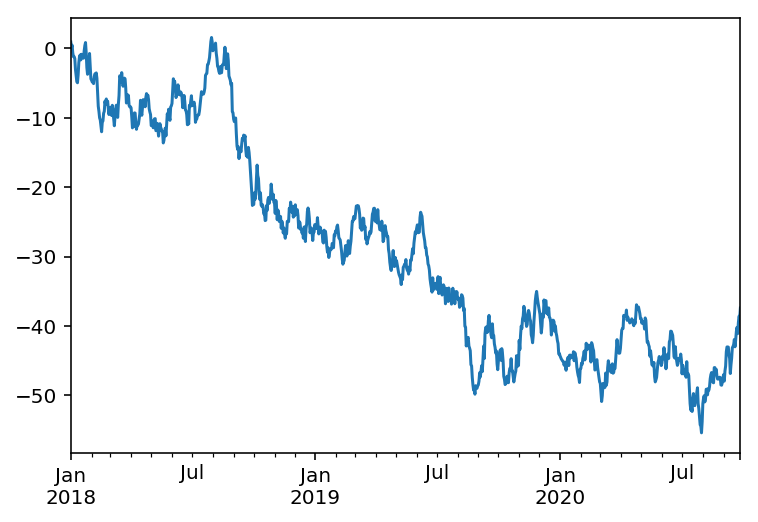

In [187]:
ts.plot()

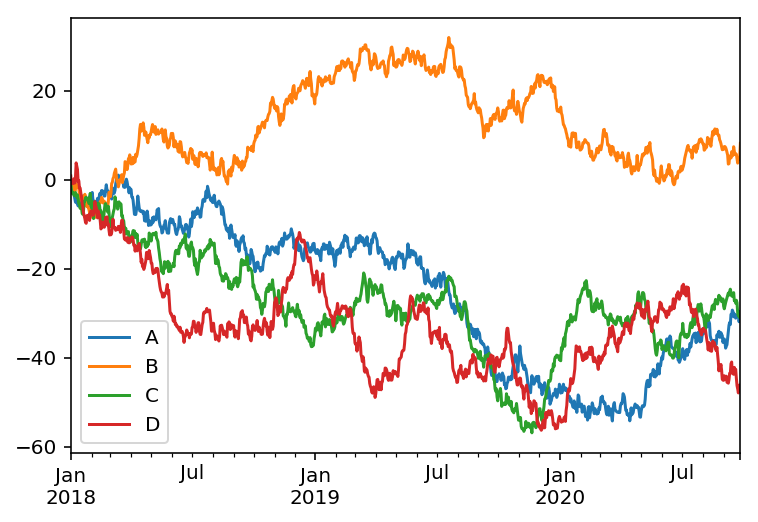

In [188]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

### Input / Output

In [195]:
# csv
df.to_csv('foo.csv', index=False)
pd.read_csv('foo.csv').tail()

,A,B,C,D
995,-30.588977,3.709308,-29.998354,-47.047088
996,-30.429268,4.556188,-30.631699,-47.954621
997,-31.951292,4.619766,-30.689880,-46.391975
998,-31.244709,5.027654,-31.011474,-46.119726
999,-29.666004,8.163908,-30.496528,-46.525632


In [197]:
# excel
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).tail()

,A,B,C,D
2020-09-22,-30.588977,3.709308,-29.998354,-47.047088
2020-09-23,-30.429268,4.556188,-30.631699,-47.954621
2020-09-24,-31.951292,4.619766,-30.689880,-46.391975
2020-09-25,-31.244709,5.027654,-31.011474,-46.119726
2020-09-26,-29.666004,8.163908,-30.496528,-46.525632
